# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [4]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [5]:
clus <-Mclust(datos, G=5)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 5 components: 

 log-likelihood  n df       BIC       ICL
      -61.27834 25 88 -405.8178 -405.8187

Clustering table:
1 2 3 4 5 
5 6 7 5 2 

'Mclust' model object: (VEV,5) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.46000,1.980000,2.080000,6.200000,0.3280000
80.61685,6.349913,8.366474,3.966725,0.7716746
84.71440,4.757112,4.757069,5.100025,0.8185677
67.86000,10.740000,17.380000,2.380000,1.6400000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          5          5

Warning message:
"package 'factoextra' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Too few points to calculate an ellipse



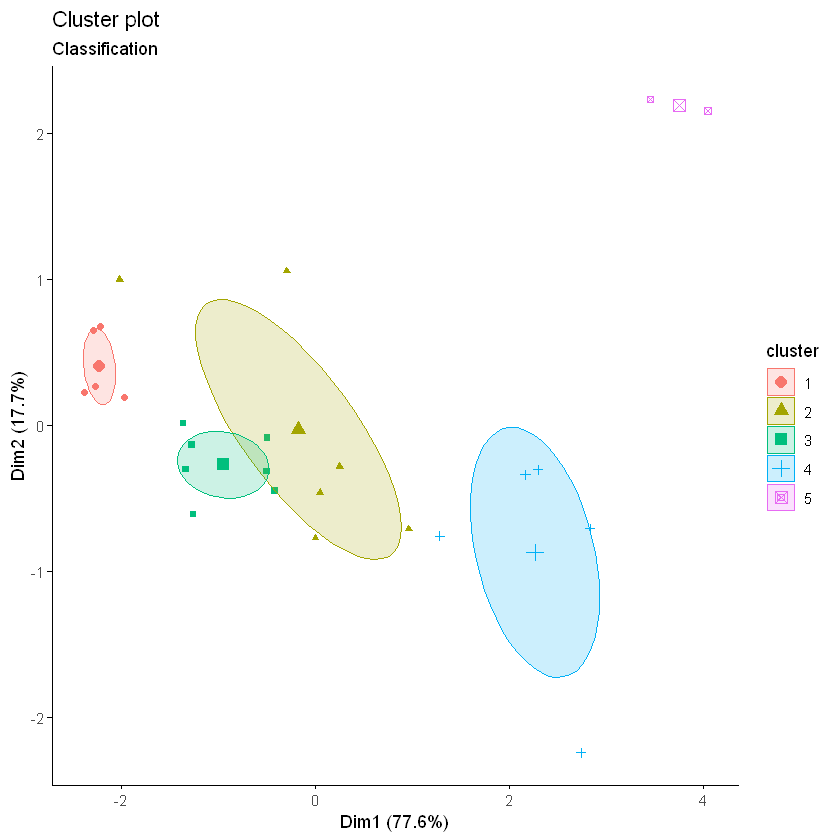

In [6]:
library(factoextra)
fviz_mclust(clus, what = "classification", geom="point", pallete = "jco")

Ejercicio 1: 

a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

**Respuesta 1**

a)Mclust realiza una comparación de datos usando una distribución gaussiana, los parametros de la función son los datos y la cantidad de gaussianas que se desea utilizar para agrupar los datos. Entones gráficamente se ven como ovalos, que en dos dimensiones serían gaussianas, donde no todos los puntos tienen la misma probabilidad de pertenecer a un grupo, hay puntos que están más cercanos a los centrados a los centros de los ovalos, de los que se influye que su asignacion es más fiable. De los puntos apartados de los ovalos, se infiere que su asignación es menos segura.

b)Dependiende del G utilizado, podemos dividir las leches en distintos grupos, pero gráficamente se pueden observar 3 grandes grupos, pero esto es muy variable, es simplemente una percepción visual.

Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 2 components: 

 log-likelihood  n df       BIC       ICL
      -176.5541 25 40 -481.8633 -481.8762

Clustering table:
 1  2 
18  7 

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
84.69570,5.001479,4.969356,4.821686,0.7596701
61.41853,9.328688,24.053235,2.356288,1.1297551


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          1          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2

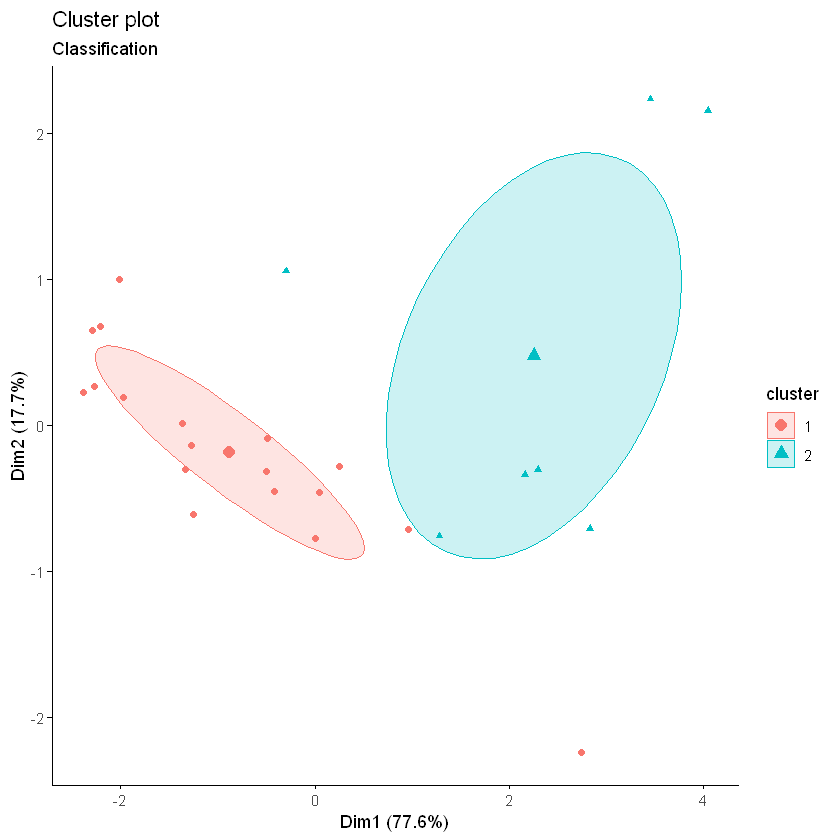

In [7]:
clus <-Mclust(datos, G=2)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

fviz_mclust(clus, what = "classification", geom="point", pallete = "jco")

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

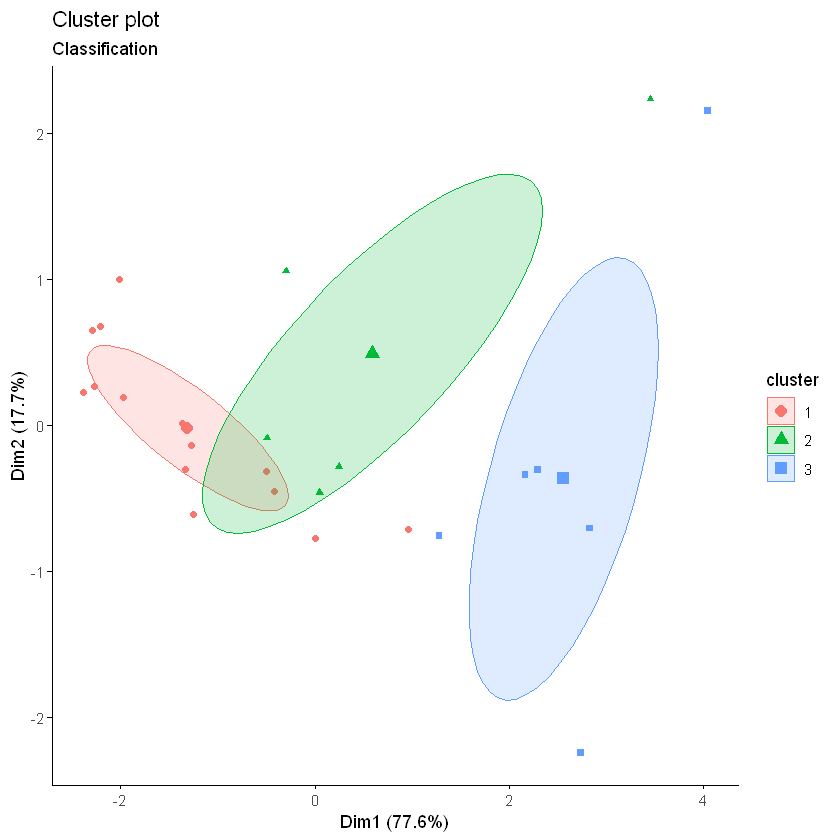

In [8]:
clus <-Mclust(datos, G=3)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

fviz_mclust(clus, what = "classification", geom="point", pallete = "jco")

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

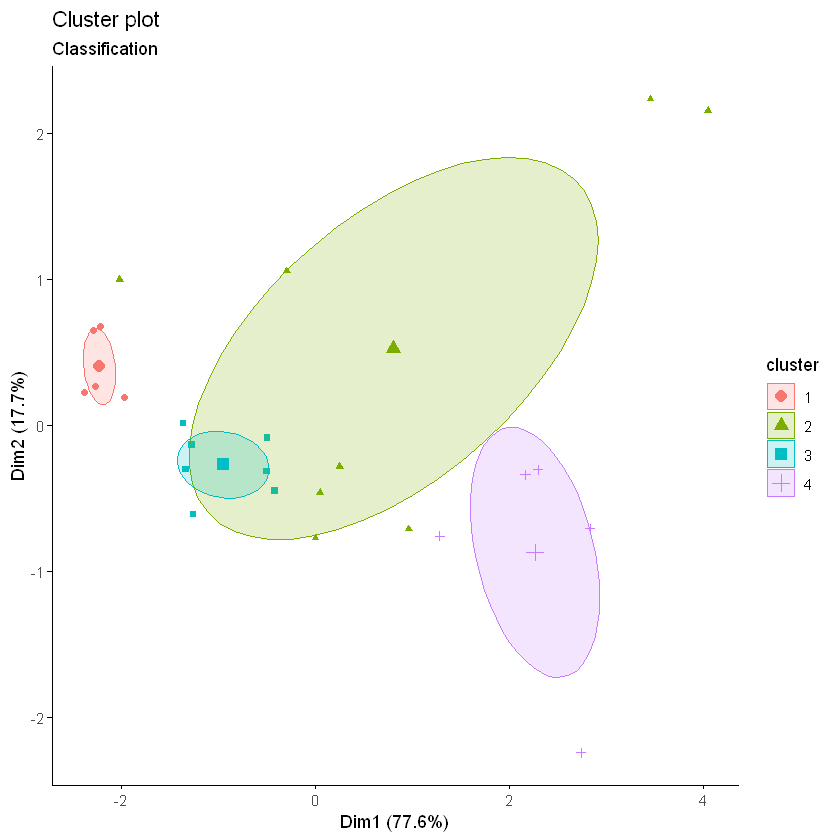

In [9]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

fviz_mclust(clus, what = "classification", geom="point", pallete = "jco")

**Respuesta 4**
Los resultados son relativamente similares, de ambos métodos se obtiene que el mejor k podría ser 3, de forma que se agruparían las leches en 3 grupos. Eso también es observable en el siguiente graficos.

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

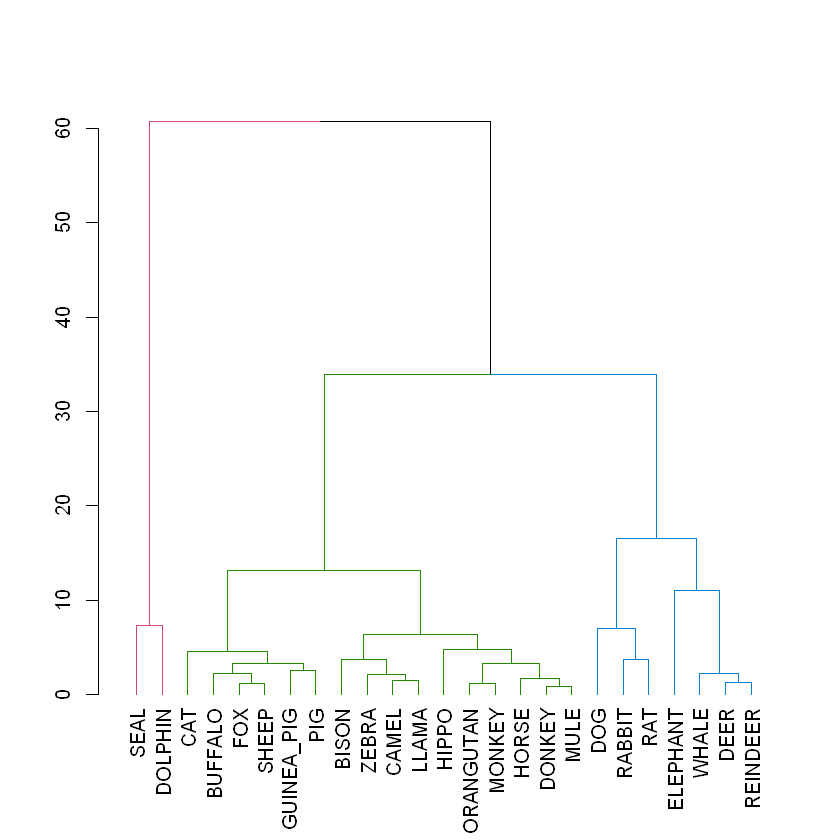

In [13]:
library(dendextend)

res3 <- hclust(dist(datos))
dend <- as.dendrogram(res3)
dend <- color_branches(dend, k=3)
plot(dend)

Ejercicio 3: 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

**Respuesta 3**

a)Lo que hace este algoritmo, es ir agrupando datos de acuerdo a su similitud, se agrupan en pares, y luego esos pares se agrupan a otro datos cercano, de forma que se construye un arbol de cercanía. Esto se observa claramente en el gráfico anterior

b)Del gráfico se puede obtener que existen 2 grandes grupos, uno que incluye a casi todas las leches, y el otro que considera solo 2 leches, la del delfin y la de la foca, dentro del grupo grande, también tenemos otra division grande de 3 grupos. Digamos que a nivel global son 3 o 4 grupos, así podríamos interpretar el gráfico.

c)

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.

b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [14]:
datos <-read.csv("iris1.csv",row.names=1,dec=".",header=TRUE)
datos<-datos[1:4]
summary(datos)
clases <- datos$Species

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   3   3   3   3   3   3   3   3   3   2   2   1   2   2   2   2   2   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  

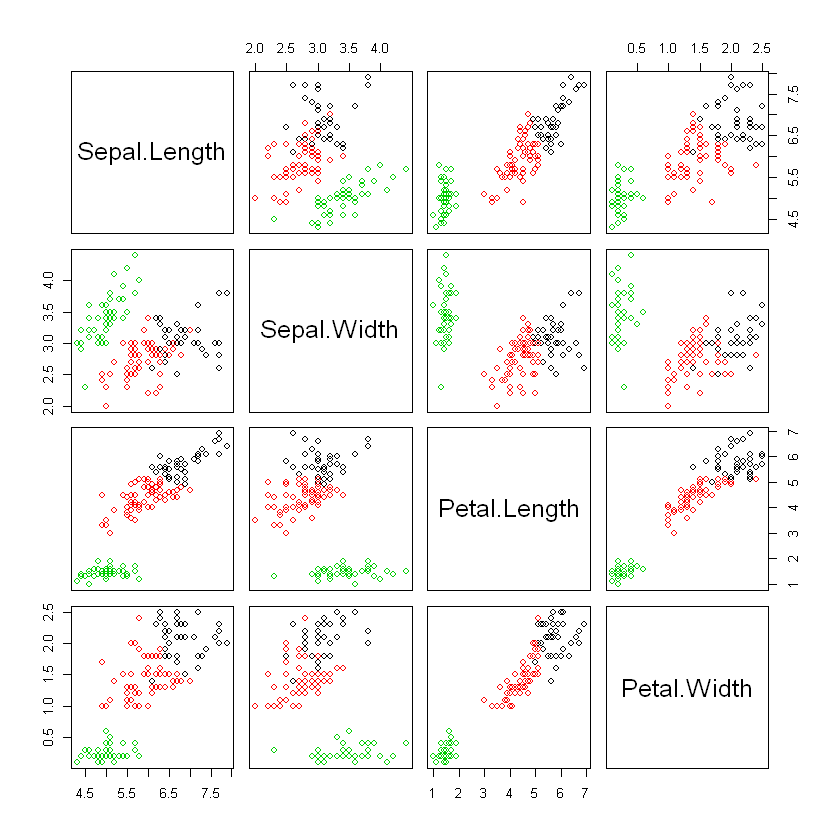

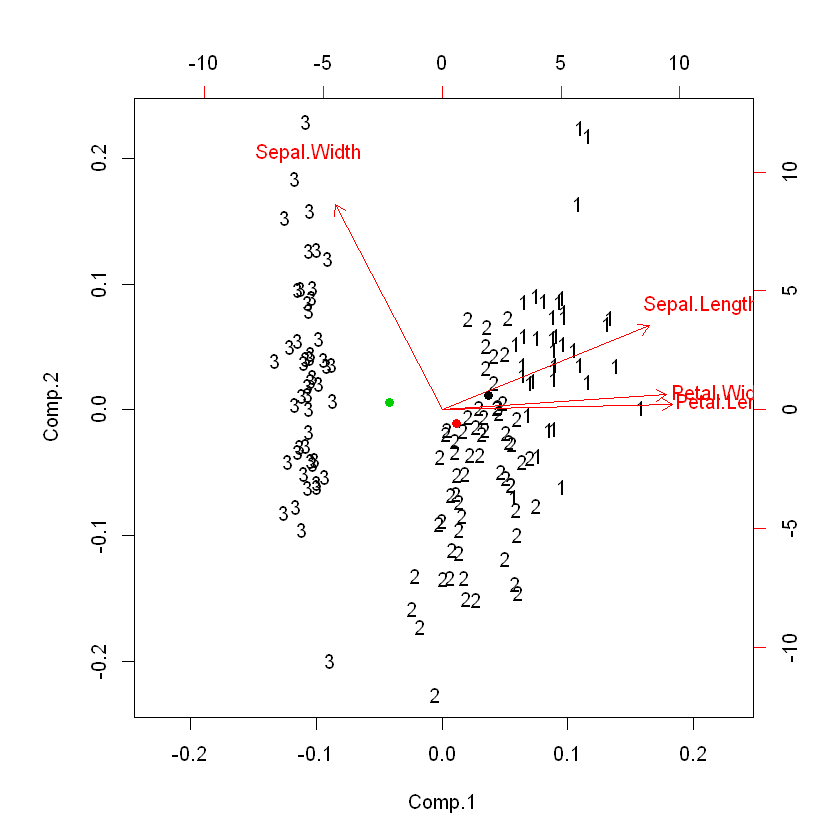

In [15]:
k0<-3
cl <- kmeans(datos, k0, iter.max = 1000, nstart = 10)
cl
pairs(datos,col=cl$cluster)

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)

biplot(res,xlabs=cl$cluster)

points(res2[,1:2],col=1:k0,pch=19)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

'Mclust' model object: (VEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.006000,3.428000,1.462000,0.246000
5.915044,2.777451,4.204002,1.298935
6.546807,2.949613,5.482252,1.985523


1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   3   2   3   2   3   2   2   2   2   3   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
141 142 143 144 145 146 147 148 149 150 
  3   3   3   3   3   3   3   3   3   3

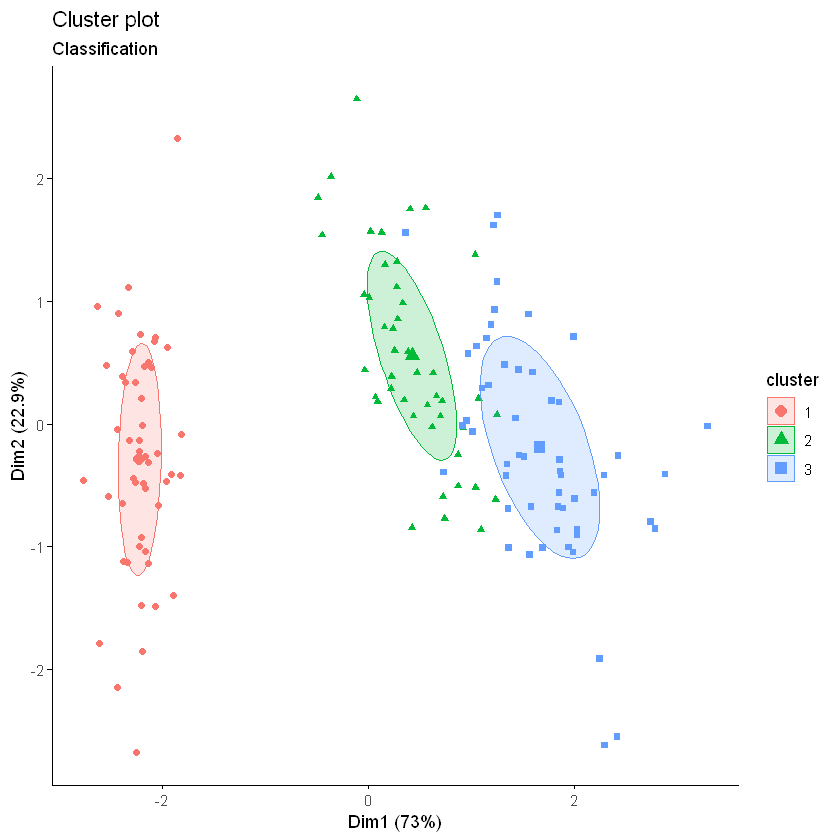

In [16]:
clus <-Mclust(datos, G=3)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

fviz_mclust(clus, what = "classification", geom="point", pallete = "jco")

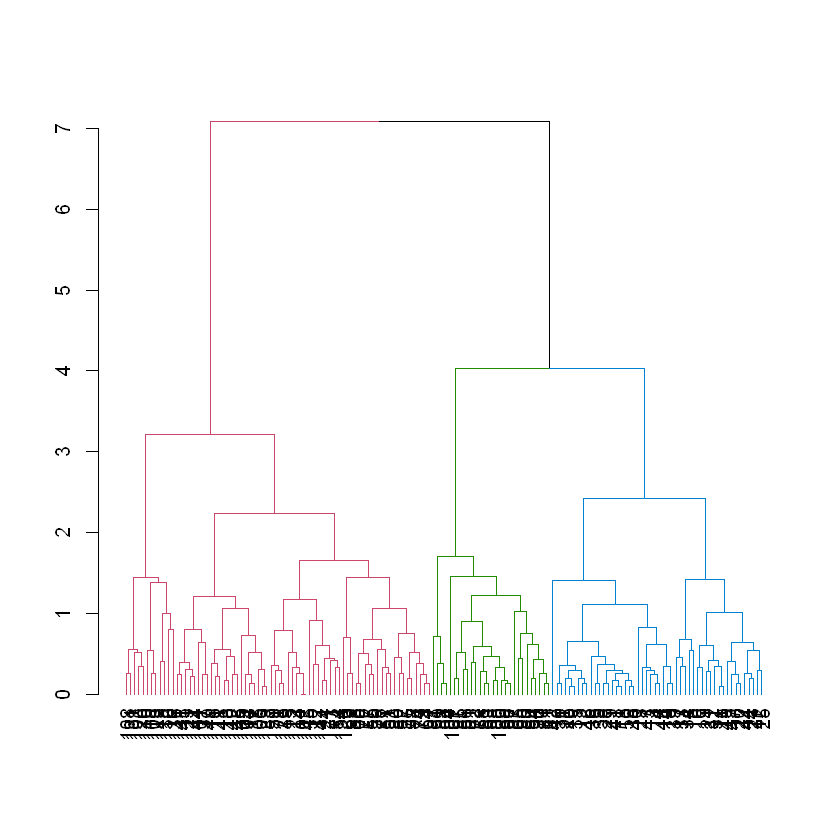

In [20]:
res3 <- hclust(dist(datos))
dend <- as.dendrogram(res3)
dend <- color_branches(dend, k=3)
plot(dend)

**Respuesta 4**

a)Luego de haber utilizado los métodos, y sabiendo que las clases de plantas son 3, podemos observar esas diferencias gráficamente, si nosotros usamos k=3 para los modelos, logran discernir bastante bien entre una y otra clase, a pesar de que hay dos clases que se parecen bastante entre si, que es donde podría haber cierto conflicto. Del primer clustering se observa que la principal diferencia entre las clases es en el largo del cepalo.

b)